<a href="https://colab.research.google.com/github/charbhuja/Stock-Market-Predicition-TataPower-Using-LSTM-Model/blob/main/pythonproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_csv('TATAPOWER.csv')

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1996-01-01,11.580205,11.662232,11.488529,11.628456,5.920809,33160.0
1,1996-01-02,11.628456,11.739433,11.396852,11.483704,5.847106,176162.0
2,1996-01-03,11.483704,11.599506,11.392027,11.411327,5.810255,104661.0
3,1996-01-04,11.411327,11.387202,11.155598,11.242449,5.724268,77718.0
4,1996-01-05,11.242449,11.483704,11.097697,11.464403,5.837278,113469.0
...,...,...,...,...,...,...,...
6856,2023-03-23,200.000000,202.199997,199.550003,200.100006,200.100006,5367782.0
6857,2023-03-24,200.100006,201.250000,192.100006,192.750000,192.750000,16010459.0
6858,2023-03-27,192.899994,194.000000,184.449997,186.649994,186.649994,22247890.0
6859,2023-03-28,186.699997,187.500000,182.350006,183.949997,183.949997,12023683.0


In [ ]:
df = df[['Date', 'Close']]

df

,Date,Close
0,1996-01-01,11.628456
1,1996-01-02,11.483704
2,1996-01-03,11.411327
3,1996-01-04,11.242449
4,1996-01-05,11.464403
...,...,...
6856,2023-03-23,200.100006
6857,2023-03-24,192.750000
6858,2023-03-27,186.649994
6859,2023-03-28,183.949997


In [ ]:
df['Date']

0       1996-01-01
1       1996-01-02
2       1996-01-03
3       1996-01-04
4       1996-01-05
           ...    
6856    2023-03-23
6857    2023-03-24
6858    2023-03-27
6859    2023-03-28
6860    2023-03-29
Name: Date, Length: 6861, dtype: object

In [ ]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('1986-03-19')
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [ ]:
df

,Date,Close
0,1996-01-01,11.628456
1,1996-01-02,11.483704
2,1996-01-03,11.411327
3,1996-01-04,11.242449
4,1996-01-05,11.464403
...,...,...
6856,2023-03-23,200.100006
6857,2023-03-24,192.750000
6858,2023-03-27,186.649994
6859,2023-03-28,183.949997


In [ ]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

<ipython-input-6-f6fc52bb0fa5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


0      1996-01-01
1      1996-01-02
2      1996-01-03
3      1996-01-04
4      1996-01-05
          ...    
6856   2023-03-23
6857   2023-03-24
6858   2023-03-27
6859   2023-03-28
6860   2023-03-29
Name: Date, Length: 6861, dtype: datetime64[ns]

In [ ]:
df.index = df.pop('Date')
df

,Close
Date,
1996-01-01,11.628456
1996-01-02,11.483704
1996-01-03,11.411327
1996-01-04,11.242449
1996-01-05,11.464403
...,...
2023-03-23,200.100006
2023-03-24,192.750000
2023-03-27,186.649994


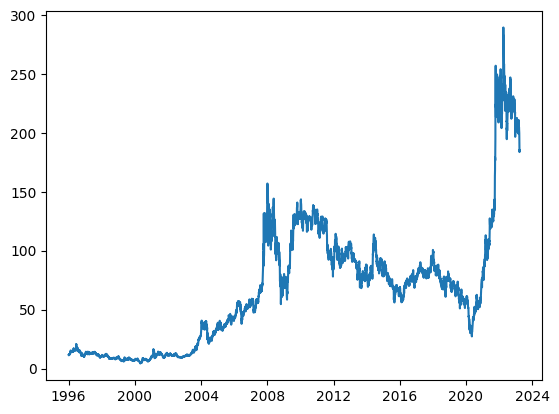

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [ ]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df, 
                                '2021-03-25', 
                                '2022-03-23', 
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2021-03-25,104.750000,104.550003,101.250000,98.650002
1,2021-03-26,104.550003,101.250000,98.650002,103.449997
2,2021-03-30,101.250000,98.650002,103.449997,103.599998
3,2021-03-31,98.650002,103.449997,103.599998,103.250000
4,2021-04-01,103.449997,103.599998,103.250000,105.050003
...,...,...,...,...,...
241,2022-03-16,233.149994,231.550003,227.399994,230.449997
242,2022-03-17,231.550003,227.399994,230.449997,231.750000
243,2022-03-21,227.399994,230.449997,231.750000,227.949997
244,2022-03-22,230.449997,231.750000,227.949997,231.399994


In [ ]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((246,), (246, 3, 1), (246,))

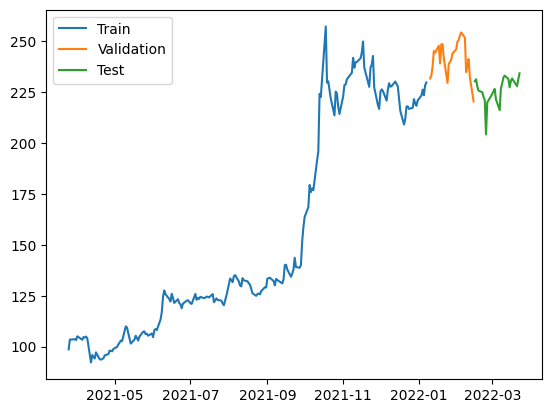

In [ ]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
7/7 [==============================] - 4s 119ms/step - loss: 26251.8848 - mean_absolute_error: 153.6838 - val_loss: 57846.1133 - val_mean_absolute_error: 240.3741
Epoch 2/100
7/7 [==============================] - 0s 13ms/step - loss: 25945.3008 - mean_absolute_error: 152.6782 - val_loss: 57383.7461 - val_mean_absolute_error: 239.4104
Epoch 3/100
7/7 [==============================] - 0s 10ms/step - loss: 25642.7441 - mean_absolute_error: 151.6639 - val_loss: 56876.0352 - val_mean_absolute_error: 238.3477
Epoch 4/100
7/7 [==============================] - 0s 11ms/step - loss: 25262.5645 - mean_absolute_error: 150.3907 - val_loss: 56120.4258 - val_mean_absolute_error: 236.7572
Epoch 5/100
7/7 [==============================] - 0s 11ms/step - loss: 24705.9141 - mean_absolute_error: 148.5311 - val_loss: 55070.1094 - val_mean_absolute_error: 234.5287
Epoch 6/100
7/7 [==============================] - 0s 13ms/step - loss: 24004.2754 - mean_absolute_error: 146.1466 - val_loss: 53

7/7 [==============================] - 2s 3ms/step


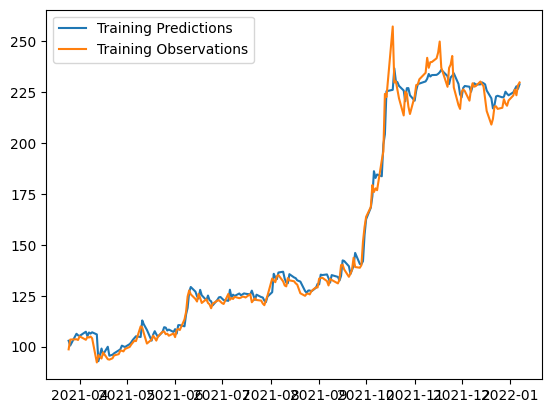

In [ ]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

1/1 [==============================] - 0s 78ms/step


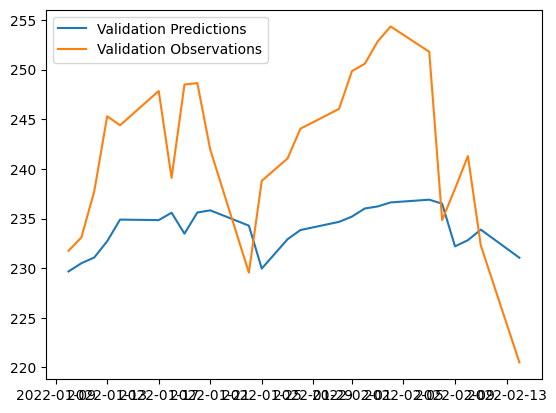

In [ ]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

1/1 [==============================] - 0s 24ms/step


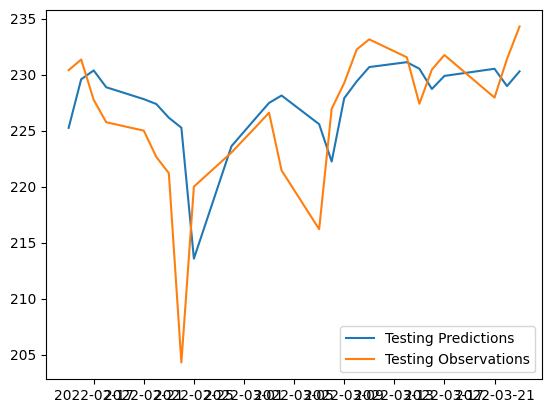

In [ ]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

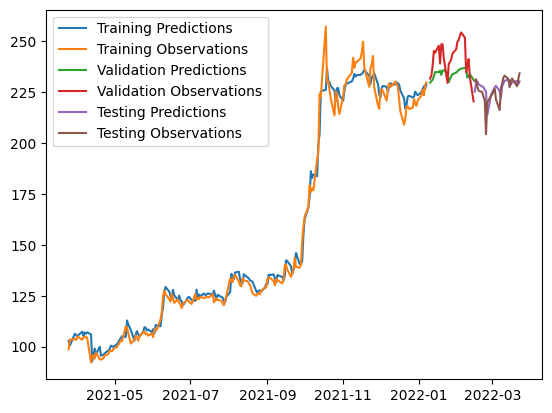

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

In [ ]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 [==============================] - 0s 22ms/step


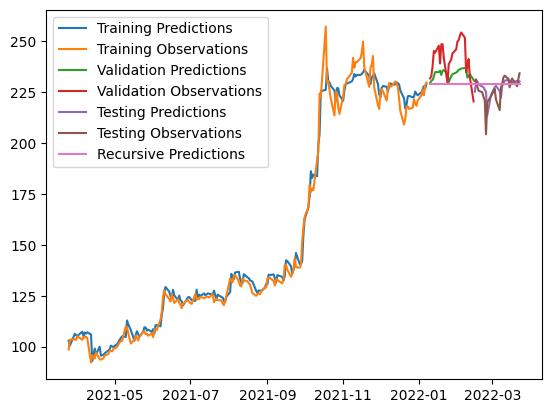

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations',
            'Recursive Predictions'])